**Healthcare Patient Risk Analysis**

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'healthcare-dataset' dataset.
Path to dataset files: /kaggle/input/healthcare-dataset


In [ ]:
print(path)

/kaggle/input/healthcare-dataset


**TASK 1**

**EXPLORATORY DATA ANALYSIS**

In [ ]:
import pandas as pd
import os

file_path = os.path.join(path, 'healthcare_dataset.csv')
df = pd.read_csv(file_path)

print("DataFrame loaded successfully. Displaying the first 5 rows:")
(df.head())

DataFrame loaded successfully. Displaying the first 5 rows:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
numerical_cols = ['Age', 'Billing Amount', 'Room Number']

print("\nDescriptive Statistics for Numerical Columns:")
display(df[numerical_cols].describe())


Descriptive Statistics for Numerical Columns:


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Plotting libraries imported.")


Plotting libraries imported.


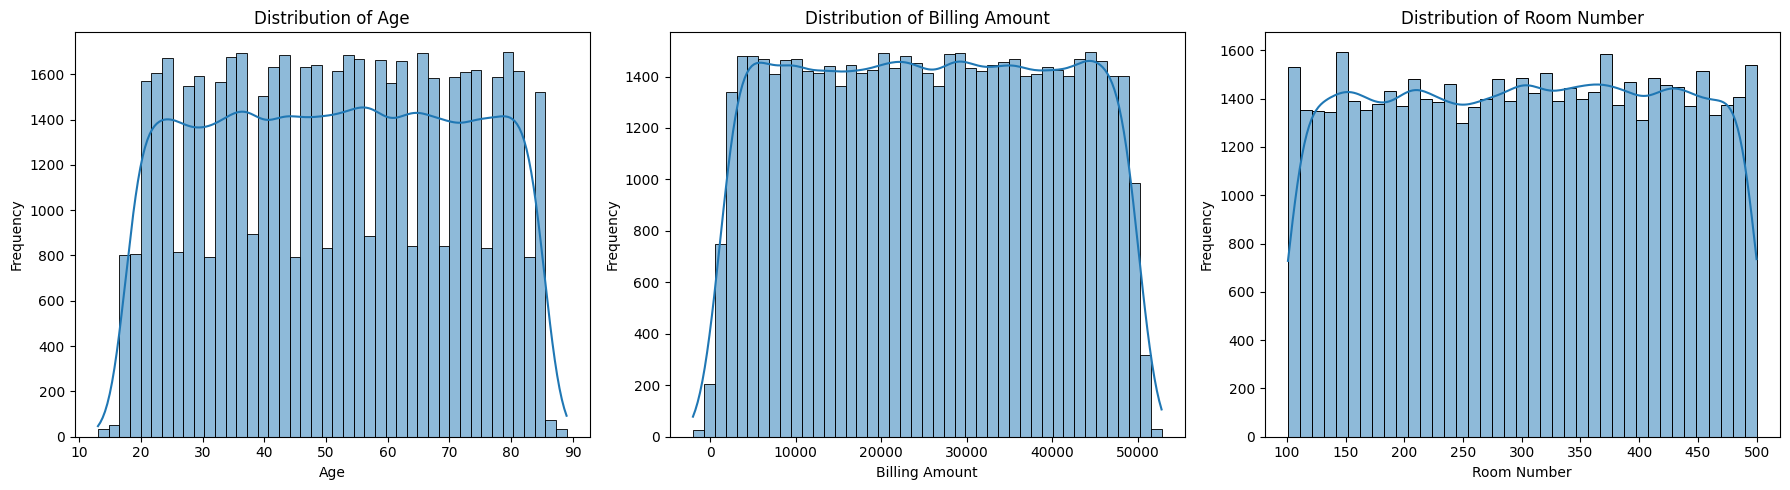

Histograms for numerical columns displayed.


In [ ]:
plt.figure(figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Histograms for numerical columns displayed.")

/tmp/ipython-input-3728835914.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-3728835914.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-3728835914.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


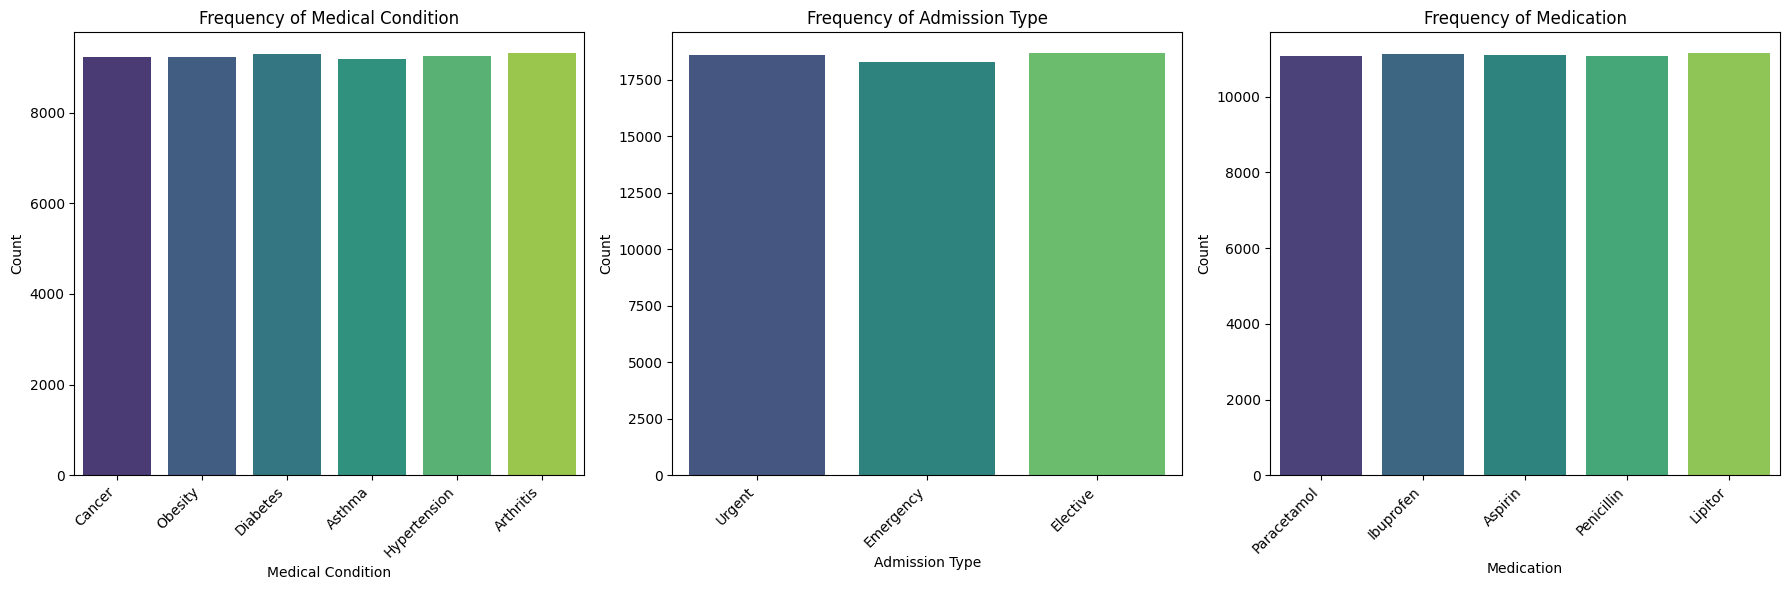

Bar charts for categorical columns displayed.


In [ ]:
categorical_cols = ['Medical Condition', 'Admission Type', 'Medication']

plt.figure(figsize=(18, 6)) # Adjust figure size for multiple plots

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

print("Bar charts for categorical columns displayed.")



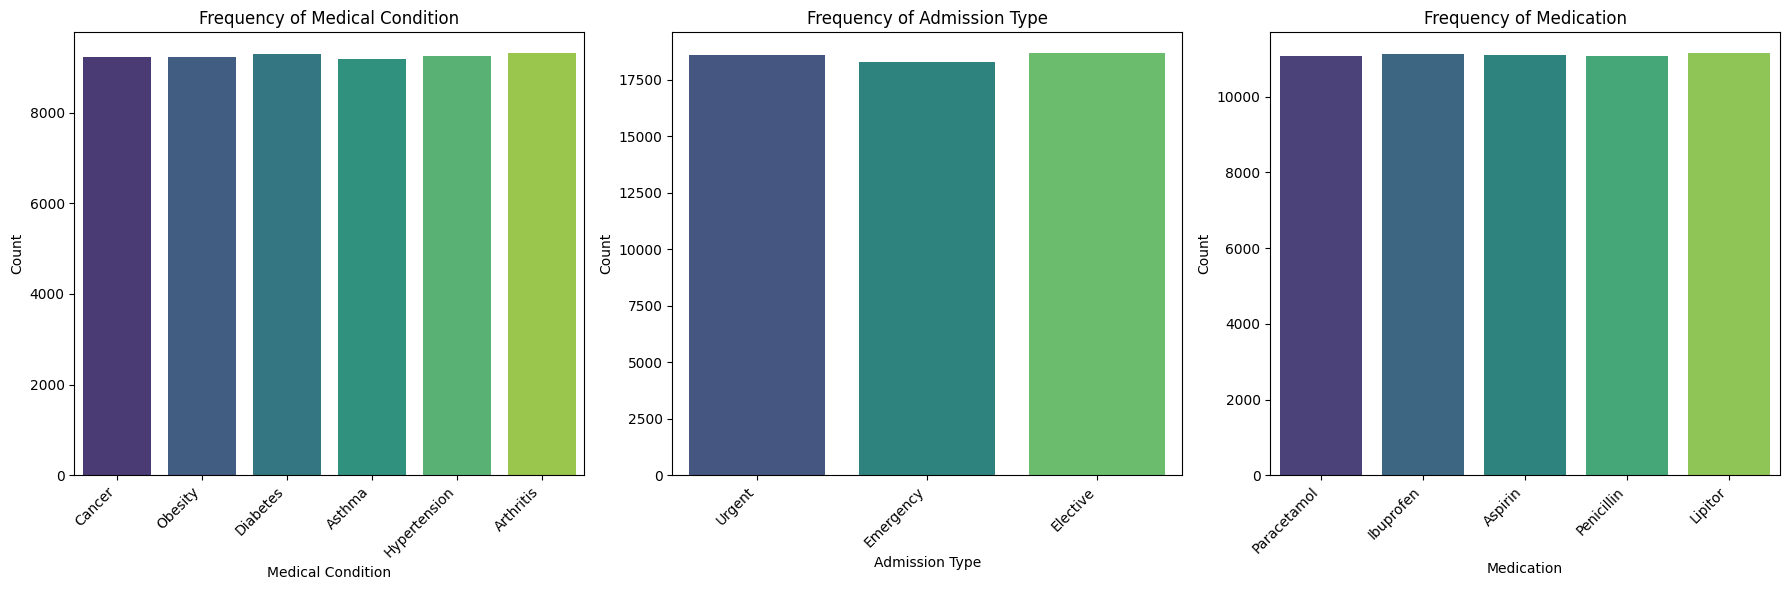

Bar charts for categorical columns displayed.


In [ ]:

categorical_cols = ['Medical Condition', 'Admission Type', 'Medication']

plt.figure(figsize=(18, 6)) # Adjust figure size for multiple plots

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

print("Bar charts for categorical columns displayed.")


**TASK 2**


SUPERVISED LEARNING

In [ ]:
y = df['Test Results']
X = df.drop(columns=['Name', 'Doctor', 'Hospital', 'Date of Admission', 'Discharge Date', 'Test Results'])

print("Target variable 'y' created. First 5 values:")
print(y.head())
print("\nFeature DataFrame 'X' created. First 5 rows:")
print(X.head())
print(f"\nShape of X: {X.shape}")

Target variable 'y' created. First 5 values:
0          Normal
1    Inconclusive
2          Normal
3        Abnormal
4        Abnormal
Name: Test Results, dtype: object

Feature DataFrame 'X' created. First 5 rows:
   Age  Gender Blood Type Medical Condition Insurance Provider  \
0   30    Male         B-            Cancer         Blue Cross   
1   62    Male         A+           Obesity           Medicare   
2   76  Female         A-           Obesity              Aetna   
3   28  Female         O+          Diabetes           Medicare   
4   43  Female        AB+            Cancer              Aetna   

   Billing Amount  Room Number Admission Type   Medication  
0    18856.281306          328         Urgent  Paracetamol  
1    33643.327287          265      Emergency    Ibuprofen  
2    27955.096079          205      Emergency      Aspirin  
3    37909.782410          450       Elective    Ibuprofen  
4    14238.317814          458         Urgent   Penicillin  

Shape of X: (55500, 9

In [ ]:
categorical_cols_for_encoding = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_cols_for_encoding, drop_first=False)

print("One-hot encoded DataFrame 'X_encoded' created. First 5 rows:")
print(X_encoded.head())
print(f"\nShape of X_encoded: {X_encoded.shape}")

One-hot encoded DataFrame 'X_encoded' created. First 5 rows:
   Age  Billing Amount  Room Number  Gender_Female  Gender_Male  \
0   30    18856.281306          328          False         True   
1   62    33643.327287          265          False         True   
2   76    27955.096079          205           True        False   
3   28    37909.782410          450           True        False   
4   43    14238.317814          458           True        False   

   Blood Type_A+  Blood Type_A-  Blood Type_AB+  Blood Type_AB-  \
0          False          False           False           False   
1           True          False           False           False   
2          False           True           False           False   
3          False          False           False           False   
4          False          False            True           False   

   Blood Type_B+  ...  Insurance Provider_Medicare  \
0          False  ...                        False   
1          False  ...    

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (44400, 32)
X_test shape: (11100, 32)
y_train shape: (44400,)
y_test shape: (11100,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Training and Prediction Complete.")

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Training and Prediction Complete.

Accuracy: 0.3399

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.34      0.45      0.39      3726
Inconclusive       0.35      0.24      0.28      3671
      Normal       0.33      0.33      0.33      3703

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.33     11100
weighted avg       0.34      0.34      0.33     11100


Confusion Matrix:
[[1678  824 1224]
 [1596  884 1191]
 [1646  846 1211]]


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols_to_scale = ['Age', 'Billing Amount', 'Room Number']

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("Numerical features scaled successfully.")

# Train the Logistic Regression model on the scaled data
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("\nModel Training and Prediction Complete on scaled data.")

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Numerical features scaled successfully.

Model Training and Prediction Complete on scaled data.

Accuracy: 0.3383

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.34      0.45      0.39      3726
Inconclusive       0.34      0.24      0.28      3671
      Normal       0.33      0.33      0.33      3703

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.33     11100
weighted avg       0.34      0.34      0.33     11100


Confusion Matrix:
[[1666  817 1243]
 [1600  869 1202]
 [1637  846 1220]]



**TASK 3**


**UNSUPERVISED LEARNING**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
billing_amount_data = df[['Billing Amount']]
print("Extracted 'Billing Amount' column:")
print(billing_amount_data.head())

Extracted 'Billing Amount' column:
   Billing Amount
0    18856.281306
1    33643.327287
2    27955.096079
3    37909.782410
4    14238.317814


In [ ]:
billing_data = df[['Billing Amount']]

iso = IsolationForest(contamination=0.05)   # 5% anomalies
df['Anomaly'] = iso.fit_predict(billing_data)
# -1 = anomaly, 1 = normal
anomalies = df[df['Anomaly'] == -1]

print("\nDetected Billing Amount Anomalies:")
display(anomalies[['Name', 'Billing Amount', 'Medical Condition']].head())



Detected Billing Amount Anomalies:


,Name,Billing Amount,Medical Condition
8,JASmINe aGuIlaR,50119.222792,Asthma
20,tIMOTHY burNs,42.514589,Asthma
40,chRiSTOPHer LEe,49943.278499,Hypertension
67,jOhN hARTmAN,49402.298373,Hypertension
77,apRil SANTIAgO,2305.139140,Diabetes


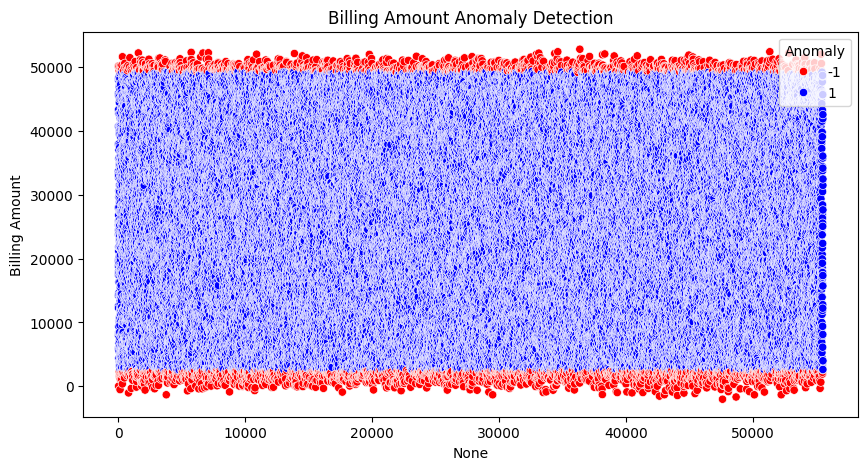


Interpretation:
Red points indicate unusually high/low billing cases. These may include rare,
high-cost treatments, extended hospital stays, or incorrect billing entries.


In [ ]:
# Plot anomalies
plt.figure(figsize=(10,5))
sns.scatterplot(
    x=df.index,
    y=df["Billing Amount"],
    hue=df["Anomaly"],
    palette={1:"blue", -1:"red"}
)
plt.title("Billing Amount Anomaly Detection")
plt.show()

print("\nInterpretation:")
print("Red points indicate unusually high/low billing cases. These may include rare,")
print("high-cost treatments, extended hospital stays, or incorrect billing entries.")

**TASK 4**


**AI TASK WITH LLMS**

In [ ]:

# Install OpenAI library, often compatible with OpenRouter APIs
!pip install openai

# Import the OpenAI library
from openai import OpenAI

# Configure the OpenRouter API with the provided API key
OPENROUTER_API_KEY = "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" # This key is provided by the user

# Initialize the OpenRouter client
client = OpenAI(
    api_key=OPENROUTER_API_KEY,
    base_url="https://openrouter.ai/api/v1"
)


print("OpenRouter API configured successfully.")

OpenRouter API configured successfully.


In [ ]:
import time
import numpy as np
import traceback
from openai import OpenAI

# ---------- FIXED OFFLINE DOCTOR RECOMMENDATION GENERATOR ----------
def generate_doctor_recommendation(predicted_result, age, medical_condition, medication, severity_hint=None):
    if isinstance(predicted_result, (int, float, np.integer, np.floating)):
        label = "Abnormal" if float(predicted_result) >= 0.5 else "Normal"
    else:
        label = str(predicted_result)

    lines = []
    lines.append(f"Patient age: {age}. Primary condition: {medical_condition}. Current medication: {medication}.")

    if label.lower().startswith("ab"):  # Abnormal case
        lines.append("Findings suggest an abnormal test result — recommend prompt specialist review.")
        lines.append("Recommended actions: arrange focused diagnostics and consider specialist referral.")
        if severity_hint:
            lines.append(f"Severity note: {severity_hint}")
        lines.append("Advice: seek urgent care if symptoms worsen (fever, severe pain, breathlessness).")
    else:  # Normal case
        lines.append("Findings are within expected limits. Continue current management and routine follow-up.")
        lines.append("Advice: maintain medication adherence and report new/worsening symptoms.")

    return "Doctor's Recommendation: " + " ".join(lines)


# ---------- RECREATE TRAIN/TEST INDICES SAFELY ----------
from sklearn.model_selection import train_test_split

indices = np.arange(len(df))

# Stratify only if column exists and is valid
stratify_col = df["Test Results"] if "Test Results" in df.columns else None

X_train_idx, X_test_idx, _, _ = train_test_split(
    indices,
    indices,
    test_size=0.2,
    random_state=42,
    stratify=stratify_col
)

# Pick a random sample from the test set
np.random.seed(42)
sample_idx = np.random.choice(X_test_idx)
sample_patient = df.loc[sample_idx]


# ---------- EXTRACT FEATURES ----------
try:
    sample_features = X_test_scaled.loc[[sample_idx]]
except:
    # If user did not scale test data, fallback to X_test
    sample_features = X_test.loc[[sample_idx]]


# ---------- PREDICT USING YOUR TRAINED MODEL ----------
try:
    predicted_test_result = model.predict(sample_features)[0]
except:
    predicted_test_result = df.loc[sample_idx, "Test Results"] if "Test Results" in df else None


# ---------- PREPARE FINAL RECOMMENDATION ----------
age = sample_patient.get('Age', 'Unknown')
medical_condition = sample_patient.get('Medical Condition', 'Unknown')
medication = sample_patient.get('Medication', 'Unknown')

recommendation = generate_doctor_recommendation(
    predicted_test_result,
    age,
    medical_condition,
    medication
)


# ---------- OUTPUT ----------
print("--- Sample AI Doctor Recommendation  ---\n")
print(recommendation)

print("\n--- Patient Information Used ---")
print(f"Index in df: {sample_idx}")
print(f"Age: {age}")
print(f"Medical Condition: {medical_condition}")
print(f"Medication: {medication}")
print(f"Predicted Test Result: {predicted_test_result}")


--- Sample AI Doctor Recommendation  ---

Doctor's Recommendation: Patient age: 24. Primary condition: Diabetes. Current medication: Aspirin. Findings suggest an abnormal test result — recommend prompt specialist review. Recommended actions: arrange focused diagnostics and consider specialist referral. Advice: seek urgent care if symptoms worsen (fever, severe pain, breathlessness).

--- Patient Information Used ---
Index in df: 36074
Age: 24
Medical Condition: Diabetes
Medication: Aspirin
Predicted Test Result: Abnormal
